In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import glob
import re
Image.MAX_IMAGE_PIXELS = None

In [2]:
def adjust_intensity(round0, roundx):
    round0 = round0.astype(float)
    roundx = roundx.astype(float)
    ratio = np.where(roundx != 0, round0 / roundx, 0)
    counts, bins = np.histogram(ratio[ratio != 0].ravel(), bins=255)
    max_count_index = np.argmax(counts)
    start = bins[max_count_index]
    end = bins[max_count_index + 1]
    ratios_in_bin = ratio[(ratio > start) & (ratio < end)]
    factor = ratios_in_bin.mean()
    adjusted_roundx = roundx * factor
    adjusted_roundx_new = np.minimum(adjusted_roundx, round0.max())
    return adjusted_roundx_new,factor

In [7]:
tissue_name='GCA033TIB_TISSUE01'
output_path='/fs5/p_masi/rudravg/MxIF_Vxm_Registered'
new_dir = os.path.join(output_path, tissue_name)

In [8]:
new_dir

'/fs5/p_masi/rudravg/MxIF_Vxm_Registered/GCA020TIB_TISSUE01'

In [9]:
files = glob.glob(os.path.join(new_dir, "*DAPI*"))
print(files)
def get_round_number(filename):
    match = re.search(r'ROUND_(\d+)', filename)
    return int(match.group(1)) if match else 0

# Sort the files by the round number
files = sorted(files, key=get_round_number)
print(files[0])
file_zer0=files[0]
image0=np.array(Image.open(file_zer0))
image_accumulator=np.zeros(image0.shape)

['/fs5/p_masi/rudravg/MxIF_Vxm_Registered/GCA020TIB_TISSUE01/GCA020TIB_TISSUE01_DAPI_DAPI_12ms_ROUND_00.tif', '/fs5/p_masi/rudravg/MxIF_Vxm_Registered/GCA020TIB_TISSUE01/GCA020TIB_TISSUE01_DAPI_DAPI_12ms_ROUND_07.tif', '/fs5/p_masi/rudravg/MxIF_Vxm_Registered/GCA020TIB_TISSUE01/GCA020TIB_TISSUE01_DAPI_DAPI_12ms_ROUND_09.tif', '/fs5/p_masi/rudravg/MxIF_Vxm_Registered/GCA020TIB_TISSUE01/GCA020TIB_TISSUE01_Cox2_DAPI_500ms_ROUND_10.tif', '/fs5/p_masi/rudravg/MxIF_Vxm_Registered/GCA020TIB_TISSUE01/GCA020TIB_TISSUE01_DAPI_DAPI_12ms_ROUND_18.tif', '/fs5/p_masi/rudravg/MxIF_Vxm_Registered/GCA020TIB_TISSUE01/GCA020TIB_TISSUE01_DAPI_DAPI_12ms_ROUND_16.tif', '/fs5/p_masi/rudravg/MxIF_Vxm_Registered/GCA020TIB_TISSUE01/GCA020TIB_TISSUE01_DAPI_DAPI_12ms_ROUND_11.tif', '/fs5/p_masi/rudravg/MxIF_Vxm_Registered/GCA020TIB_TISSUE01/GCA020TIB_TISSUE01_DAPI_DAPI_12ms_ROUND_08.tif', '/fs5/p_masi/rudravg/MxIF_Vxm_Registered/GCA020TIB_TISSUE01/GCA020TIB_TISSUE01_DAPI_DAPI_12ms_ROUND_06.tif', '/fs5/p_masi/rudr

In [10]:
from tqdm import tqdm
for file in tqdm(files):
    image=np.array(Image.open(file))
    image,_=adjust_intensity(image0,image)
    image_accumulator+=image
image_accumulator=image_accumulator/len(files)

  0%|          | 0/20 [00:00<?, ?it/s]/tmp/ipykernel_877532/1703677636.py:4: RuntimeWarning: invalid value encountered in divide
  ratio = np.where(roundx != 0, round0 / roundx, 0)
  5%|▌         | 1/20 [00:04<01:28,  4.67s/it]/tmp/ipykernel_877532/1703677636.py:4: RuntimeWarning: divide by zero encountered in divide
  ratio = np.where(roundx != 0, round0 / roundx, 0)
100%|██████████| 20/20 [00:55<00:00,  2.76s/it]


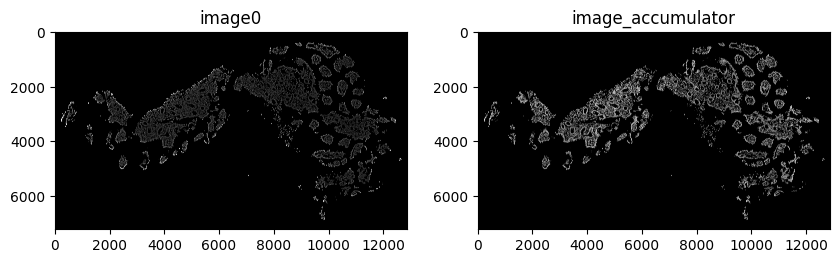

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot image0 in the first subplot
axs[0].imshow(image0, cmap='gray')
axs[0].set_title('image0')

# Plot image_accumulator in the second subplot
axs[1].imshow(image_accumulator, cmap='gray')
axs[1].set_title('image_accumulator')

# Display the plot
plt.show()

In [12]:
np.max(image_accumulator)

135.2633938851776

In [13]:
def calculate_ncc(array1, array2):
    """
    Calculate normalized cross correlation
    Args:
    array1: 1D array of your image1. Use np.rave() to convert 2D image to 1D
    array2: 1D array of your image2.
    Returns: Normalized cross correlation
    """
    array1 = (array1 - np.mean(array1)) / (np.std(array1) * len(array1))
    array2 = (array2 - np.mean(array2)) / (np.std(array2))
    ncc = np.correlate(array1, array2)
    return ncc

In [14]:
calculate_ncc(image0.ravel(), image_accumulator.ravel())

array([0.89199671])

In [ ]:
print(os.path.join(new_dir,"AverageDAPI"))

In [15]:
Image.fromarray(np.uint8(image_accumulator)).save(os.path.join(new_dir,"AverageDAPI.tif"))